push-up dataset: https://www.kaggle.com/datasets/shoreefuddin/pushup-exercise


use mediapipe to extract body landmarks and save them into csv file(pandas to read it). Rmb to normalize the coordinates, then save it to another csv file. rmb to put exception handling when there is no landmarks detected.

then, make an imitation game. the game will render a yoga pose on the screen, the user has to hold a yoga pose for 3 seconds. normalize the coordinates from the yoga model and the user, then use MSE to calculate the differences between the coordinates, convert the differences to "similarity percentage" so that it can motivate the user.

# Testing some codes

In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [16]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        
        print("`results`:")
        print(results.pose_landmarks)
        print("Right heel")
        print(f'coordinates: ({str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width)}, {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_height)})')
        print(f"visibility: {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility)}")
        print("="*40)
        print()
        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
        if cv2.waitKey(1000) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

`results`:
landmark {
  x: 0.5231221914291382
  y: 0.6577993035316467
  z: -0.7315223813056946
  visibility: 0.9999747276306152
}
landmark {
  x: 0.5411818027496338
  y: 0.6018832325935364
  z: -0.705822229385376
  visibility: 0.9999366998672485
}
landmark {
  x: 0.553436815738678
  y: 0.6014288663864136
  z: -0.705657422542572
  visibility: 0.9999321699142456
}
landmark {
  x: 0.5646323561668396
  y: 0.6015502214431763
  z: -0.705722451210022
  visibility: 0.999923825263977
}
landmark {
  x: 0.49908095598220825
  y: 0.6030294895172119
  z: -0.7145636677742004
  visibility: 0.9999421834945679
}
landmark {
  x: 0.48159533739089966
  y: 0.6038755774497986
  z: -0.7140453457832336
  visibility: 0.9999399185180664
}
landmark {
  x: 0.4677272439002991
  y: 0.6051908135414124
  z: -0.7141749858856201
  visibility: 0.9999386072158813
}
landmark {
  x: 0.5825813412666321
  y: 0.6125553250312805
  z: -0.4474102854728699
  visibility: 0.9999340772628784
}
landmark {
  x: 0.44363561272621155
  y:

`results`:
landmark {
  x: 0.5116280317306519
  y: 0.6583439707756042
  z: -0.6570634841918945
  visibility: 0.9999731183052063
}
landmark {
  x: 0.5314895510673523
  y: 0.6032058596611023
  z: -0.6390867233276367
  visibility: 0.9999334812164307
}
landmark {
  x: 0.5439097285270691
  y: 0.6022384762763977
  z: -0.6389302611351013
  visibility: 0.999929666519165
}
landmark {
  x: 0.5553519129753113
  y: 0.6018106937408447
  z: -0.6391948461532593
  visibility: 0.9999216198921204
}
landmark {
  x: 0.48543882369995117
  y: 0.605696439743042
  z: -0.6409986019134521
  visibility: 0.9999402761459351
}
landmark {
  x: 0.46906304359436035
  y: 0.6063778400421143
  z: -0.640356183052063
  visibility: 0.999938428401947
}
landmark {
  x: 0.4556906819343567
  y: 0.6076662540435791
  z: -0.6404147744178772
  visibility: 0.9999369978904724
}
landmark {
  x: 0.5744059085845947
  y: 0.6094421744346619
  z: -0.4019196629524231
  visibility: 0.9999323487281799
}
landmark {
  x: 0.43758636713027954
  y

In [21]:
# For static images:
IMAGE_FILES = ["Pushup dataset/dataset/push_up_DOWN/pushup%20(37)_jpg.rf.ae351afe48f05f706eb7958127a04a00.jpg", "Pushup dataset/dataset/push_up_DOWN/pushup%20(38)_jpg.rf.1056831778bcfb522853ae06947e38c0.jpg"]
with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True, min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES):
        print(f"For image {file}:")
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            continue
        #print("results = ")
        #print(results.pose_landmarks)
        print("Right heel")
        print(f'coordinates: ({str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width)}, {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_height)})')
        print(f"visibility: {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility)}")
        # Draw pose landmarks on the image.
        mp_drawing.draw_landmarks(image, results.pose_landmarks, landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        cv2.imshow("Annotated img", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

For image Pushup dataset/dataset/push_up_DOWN/pushup%20(37)_jpg.rf.ae351afe48f05f706eb7958127a04a00.jpg:
Right heel
coordinates: (6.734342575073242, 131.01159572601318)
visibility: 0.9922358393669128
For image Pushup dataset/dataset/push_up_DOWN/pushup%20(38)_jpg.rf.1056831778bcfb522853ae06947e38c0.jpg:
Right heel
coordinates: (5.398136138916016, 114.5627851486206)
visibility: 0.9895687699317932


# Transforming the images into structured dataset

Use the Mediapipe to extract body landmarks from the images, then record them into a CSV file.

In [3]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
pushup_DOWN_path = "Pushup dataset/dataset/push_up_DOWN"
pushup_UP_path = "Pushup dataset/dataset/push_up_UP"

In [4]:
# the features exclude the facial landmarks, becoz those are not helpful at determining push-up
features = [
    mp_pose.PoseLandmark.LEFT_SHOULDER,
    mp_pose.PoseLandmark.RIGHT_SHOULDER,
    mp_pose.PoseLandmark.LEFT_ELBOW,
    mp_pose.PoseLandmark.RIGHT_ELBOW,
    mp_pose.PoseLandmark.LEFT_WRIST,
    mp_pose.PoseLandmark.RIGHT_WRIST,
    mp_pose.PoseLandmark.LEFT_PINKY,
    mp_pose.PoseLandmark.RIGHT_PINKY,
    mp_pose.PoseLandmark.LEFT_INDEX,
    mp_pose.PoseLandmark.RIGHT_INDEX,
    mp_pose.PoseLandmark.LEFT_THUMB,
    mp_pose.PoseLandmark.RIGHT_THUMB,
    mp_pose.PoseLandmark.LEFT_HIP,
    mp_pose.PoseLandmark.RIGHT_HIP,
    mp_pose.PoseLandmark.LEFT_KNEE,
    mp_pose.PoseLandmark.RIGHT_KNEE,
    mp_pose.PoseLandmark.LEFT_ANKLE,
    mp_pose.PoseLandmark.RIGHT_ANKLE,
    mp_pose.PoseLandmark.LEFT_HEEL,
    mp_pose.PoseLandmark.RIGHT_HEEL,
    mp_pose.PoseLandmark.LEFT_FOOT_INDEX,
    mp_pose.PoseLandmark.RIGHT_FOOT_INDEX
]

feature_names = [
    "LEFT_SHOULDER",
    "RIGHT_SHOULDER",
    "LEFT_ELBOW",
    "RIGHT_ELBOW",
    "LEFT_WRIST",
    "RIGHT_WRIST",
    "LEFT_PINKY",
    "RIGHT_PINKY",
    "LEFT_INDEX",
    "RIGHT_INDEX",
    "LEFT_THUMB",
    "RIGHT_THUMB",
    "LEFT_HIP",
    "RIGHT_HIP",
    "LEFT_KNEE",
    "RIGHT_KNEE",
    "LEFT_ANKLE",
    "RIGHT_ANKLE",
    "LEFT_HEEL",
    "RIGHT_HEEL",
    "LEFT_FOOT_INDEX",
    "RIGHT_FOOT_INDEX"
]

classes = {
    "push_up_DOWN": 0,
    "push_up_UP": 1
}
print("Number of features (each feature has x-, y-, and z-coordinates) = ", len(features) * 3)

Number of features (each feature has x-, y-, and z-coordinates) =  66


In [5]:
def normalize_pose_landmarks(pose_landmarks_dict):
    """Calculates pose center as point between hips."""
    left_hip = pose_landmarks_dict['LEFT_HIP']
    right_hip = pose_landmarks_dict['RIGHT_HIP']
    center = []
    for i in range(len(left_hip)):
        center.append((left_hip[i] + right_hip[i]) * 0.5)
    for key, coordinates in pose_landmarks_dict.items():
        for i in range(len(coordinates)):
            coordinates[i] -= center[i]
        pose_landmarks_dict[key] = coordinates
    return pose_landmarks_dict

In [6]:
import os
import csv
import sys

pushup_DOWN_imgs = os.listdir(pushup_DOWN_path)
pushup_UP_imgs = os.listdir(pushup_UP_path)
filename = "Pushup dataset/dataset/normalized_landmarks.csv"
with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True, min_detection_confidence=0.5) as pose:
    print("Detecting landmarks on push-up DOWN images:")
    pushup_DOWN_records = []
    for idx, file in enumerate(pushup_DOWN_imgs):
        image = cv2.imread(os.path.join(pushup_DOWN_path, file))
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            print(f"Failed to detect landmarks for file {file}...")
            continue
        
        # extract the x-, y-, and z-coordinates of the 22 body landmarks as features
        record = []
        landmarks_dict_UP = {}
        for index, ft in enumerate(features):
            landmark_coordinates = results.pose_landmarks.landmark[ft]
            landmarks_dict_UP[feature_names[index]] = [landmark_coordinates.x, landmark_coordinates.y, landmark_coordinates.z]
        landmarks_dict_UP = normalize_pose_landmarks(landmarks_dict_UP)
        
        for normalized_coordinates in landmarks_dict_UP.values():
            for normalized_coor in normalized_coordinates:
                record.append(normalized_coor)
        
        record.append(classes["push_up_DOWN"])
        pushup_DOWN_records.append(record)
        record = []
        #print("results = ")
        #print(results.pose_landmarks)
#         print("Right heel")
#         print(f'coordinates: ({str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width)}, {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_height)})')
#         print(f"visibility: {str(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].visibility)}")
    
    pushup_UP_records = []
    print("Detecting landmarks on push-up UP images:")
    for idx, file in enumerate(pushup_UP_imgs):
        image = cv2.imread(os.path.join(pushup_UP_path, file))
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            print(f"Failed to detect landmarks for file {file}...")
            continue
        
        # extract the x-, y-, and z-coordinates of the 22 body landmarks as features
        record = []
        landmarks_dict_DOWN = {}
        for index, ft in enumerate(features):
            landmark_coordinates = results.pose_landmarks.landmark[ft]
            landmarks_dict_DOWN[feature_names[index]] = [landmark_coordinates.x, landmark_coordinates.y, landmark_coordinates.z]
        landmarks_dict_DOWN = normalize_pose_landmarks(landmarks_dict_DOWN)
        
        for normalized_coordinates in landmarks_dict_DOWN.values():
            for normalized_coor in normalized_coordinates:
                record.append(normalized_coor)
        
        record.append(classes["push_up_UP"])
        pushup_UP_records.append(record)
        record = []
        
    # writing to csv file
    with open(filename, 'w', newline="") as csvfile:
        csvwriter = csv.writer(csvfile)
        # writing the records
        csvwriter.writerows(pushup_DOWN_records)
        csvwriter.writerows(pushup_UP_records)
        
        print(f"Successfully written {str(len(pushup_DOWN_records))} records for push up DOWN")
        print(f"Successfully written {str(len(pushup_UP_records))} records for push up UP")
    
        

Detecting landmarks on push-up DOWN images:
Failed to detect landmarks for file pushup%20(1367)_jpg.rf.a63b99405067713b069fb43266015a8b.jpg...
Failed to detect landmarks for file pushup%20(139)_jpg.rf.50a57574e8f2ba2f11b95e67686559ae.jpg...
Failed to detect landmarks for file pushup%20(142)_jpg.rf.95ecf54f666b802e288973dc2816f1c1.jpg...
Failed to detect landmarks for file pushup%20(144)_jpg.rf.88a2cd8783a853bbdbd2b9a3b4edd2de.jpg...
Failed to detect landmarks for file pushup%20(171)_jpg.rf.b1acf9e4728e949be60330de73c5814b.jpg...
Failed to detect landmarks for file pushup%20(173)_jpg.rf.eb9e35984121b162f556f0ff4cb335c7.jpg...
Failed to detect landmarks for file pushup%20(175)_jpg.rf.377ae3851efc7b222ce838ef8c55f0fc.jpg...
Failed to detect landmarks for file pushup%20(176)_jpg.rf.4ff4089d3848bb4bbd28bcc891cd8ad9.jpg...
Failed to detect landmarks for file pushup%20(186)_jpg.rf.fefae3a411c9a9be7fb9ed52883c4dee.jpg...
Failed to detect landmarks for file pushup%20(189)_jpg.rf.3b4b909d5e06845

# Training to classify Push-up positions

To save the computing resources, we have to determine whether the person is no longer standing, then the prediction starts!

Following https://www.tensorflow.org/tutorials/structured_data/imbalanced_data to build MLP for solving binary classification task!

In [10]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [20]:
header_names = [
    "LEFT_SHOULDER_x",
    "LEFT_SHOULDER_y",
    "LEFT_SHOULDER_z",
    "RIGHT_SHOULDER_x",
    "RIGHT_SHOULDER_y",
    "RIGHT_SHOULDER_z",
    "LEFT_ELBOW_x",
    "LEFT_ELBOW_y",
    "LEFT_ELBOW_z",
    "RIGHT_ELBOW_x",
    "RIGHT_ELBOW_y",
    "RIGHT_ELBOW_z",
    "LEFT_WRIST_x",
    "LEFT_WRIST_y",
    "LEFT_WRIST_z",
    "RIGHT_WRIST_x",
    "RIGHT_WRIST_y",
    "RIGHT_WRIST_z",
    "LEFT_PINKY_x",
    "LEFT_PINKY_y",
    "LEFT_PINKY_z",
    "RIGHT_PINKY_x",
    "RIGHT_PINKY_y",
    "RIGHT_PINKY_z",
    "LEFT_INDEX_x",
    "LEFT_INDEX_y",
    "LEFT_INDEX_z",
    "RIGHT_INDEX_x",
    "RIGHT_INDEX_y",
    "RIGHT_INDEX_z",
    "LEFT_THUMB_x",
    "LEFT_THUMB_y",
    "LEFT_THUMB_z",
    "RIGHT_THUMB_x",
    "RIGHT_THUMB_y",
    "RIGHT_THUMB_z",
    "LEFT_HIP_x",
    "LEFT_HIP_y",
    "LEFT_HIP_z",
    "RIGHT_HIP_x",
    "RIGHT_HIP_y",
    "RIGHT_HIP_z",
    "LEFT_KNEE_x",
    "LEFT_KNEE_y",
    "LEFT_KNEE_z",
    "RIGHT_KNEE_x",
    "RIGHT_KNEE_y",
    "RIGHT_KNEE_z",
    "LEFT_ANKLE_x",
    "LEFT_ANKLE_y",
    "LEFT_ANKLE_z",
    "RIGHT_ANKLE_x",
    "RIGHT_ANKLE_y",
    "RIGHT_ANKLE_z",
    "LEFT_HEEL_x",
    "LEFT_HEEL_y",
    "LEFT_HEEL_z",
    "RIGHT_HEEL_x",
    "RIGHT_HEEL_y",
    "RIGHT_HEEL_z",
    "LEFT_FOOT_INDEX_x",
    "LEFT_FOOT_INDEX_y",
    "LEFT_FOOT_INDEX_z",
    "RIGHT_FOOT_INDEX_x",
    "RIGHT_FOOT_INDEX_y",
    "RIGHT_FOOT_INDEX_z",
    "Class"
]

In [22]:
file_path = "Pushup dataset/dataset/normalized_landmarks.csv"
raw_df = pd.read_csv(file_path, names=header_names)
raw_df.head()

,LEFT_SHOULDER_x,LEFT_SHOULDER_y,LEFT_SHOULDER_z,RIGHT_SHOULDER_x,RIGHT_SHOULDER_y,RIGHT_SHOULDER_z,LEFT_ELBOW_x,LEFT_ELBOW_y,LEFT_ELBOW_z,RIGHT_ELBOW_x,...,RIGHT_HEEL_x,RIGHT_HEEL_y,RIGHT_HEEL_z,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,Class
0,-0.162400,-0.021789,-0.377565,-0.171999,-0.061876,-0.062494,-0.074893,0.014111,-0.395355,-0.094724,...,0.227616,-0.027204,0.474550,0.243979,0.077510,0.211590,0.211578,0.044210,0.426334,0
1,-0.178497,0.026744,-0.338163,-0.175591,-0.050302,-0.077744,-0.065337,0.036699,-0.421222,-0.093494,...,0.229708,-0.064892,0.443227,0.241811,0.041740,0.176886,0.212103,0.004890,0.405839,0
2,-0.182783,0.024164,-0.269931,-0.169755,-0.048077,0.022116,-0.087491,0.010708,-0.377556,-0.092932,...,0.223405,-0.065481,0.459805,0.227641,0.044015,0.159177,0.194941,0.000570,0.429251,0
3,-0.183798,0.012297,-0.235587,-0.172315,-0.050491,0.037521,-0.094058,-0.005621,-0.330502,-0.098886,...,0.222964,-0.064341,0.374220,0.231818,0.042856,0.107644,0.195705,0.002633,0.340164,0
4,0.318522,0.094586,-0.300200,0.141501,0.180830,-0.492169,0.302394,-0.041396,-0.042284,-0.031810,...,-0.214177,-0.159988,0.785608,-0.166425,-0.109495,1.009393,-0.231830,-0.093816,0.793779,0


In [24]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n Negative: {} ({:.2f}% of total)'.format(
    total, pos, 100 * pos / total, neg, 100 * neg / total))

Examples:
    Total: 554
    Positive: 279 (50.36% of total)
 Negative: 275 (49.64% of total)


In [25]:
train_df, test_df = train_test_split(raw_df, test_size=0.2)
print(train_df.shape)
print(test_df.shape)

(443, 67)
(111, 67)


In [26]:
y_train = np.array(train_df.pop("Class"))
X_train = np.array(train_df)
y_test = np.array(test_df.pop("Class"))
X_test = np.array(test_df)

In [32]:
model = keras.Sequential([
      keras.layers.Dense( 128, activation='relu', input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics="accuracy"
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               8576      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [33]:
EPOCHS = 100
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [34]:
history = model.fit(
    X_train, 
    y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_split = 0.2
)

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 0.6487 - accuracy: 0.6186 - val_loss: 0.5493 - val_accuracy: 0.8427
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.8220 - val_loss: 0.4851 - val_accuracy: 0.8539
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4691 - accuracy: 0.8729 - val_loss: 0.4324 - val_accuracy: 0.8876
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4291 - accuracy: 0.8898 - val_loss: 0.3922 - val_accuracy: 0.9101
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3793 - accuracy: 0.9181 - val_loss: 0.3536 - val_accuracy: 0.8876
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3462 - accuracy: 0.9068 - val_loss: 0.3219 - val_accuracy: 0.9101
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3227 - accuracy: 0.9181 - val_loss: 0.3006 - val_accuracy: 0.9213
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0675 - accuracy: 0.9802 - val_loss: 0.0692 - val_accuracy: 0.9775
Epoch 60/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.9746 - val_loss: 0.0716 - val_accuracy: 0.9775
Epoch 61/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0641 - accuracy: 0.9887 - val_loss: 0.0680 - val_accuracy: 0.9775
Epoch 62/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0753 - accuracy: 0.9689 - val_loss: 0.0670 - val_accuracy: 0.9775
Epoch 63/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0725 - accuracy: 0.9718 - val_loss: 0.0660 - val_accuracy: 0.9775
Epoch 64/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9859 - val_loss: 0.0642 - val_accuracy: 0.9775
Epoch 65/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0572 - accuracy: 0.9774 - val_loss: 0.0640 - val_accuracy: 0.9775
Epoch 

In [36]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print("Test loss:", test_loss)

4/4 - 0s - loss: 0.0177 - accuracy: 1.0000

Test accuracy: 1.0
Test loss: 0.017713749781250954


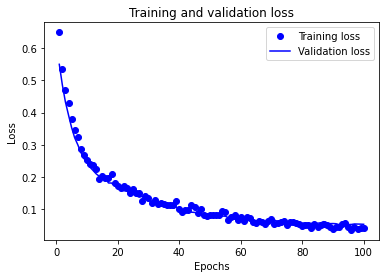

In [37]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

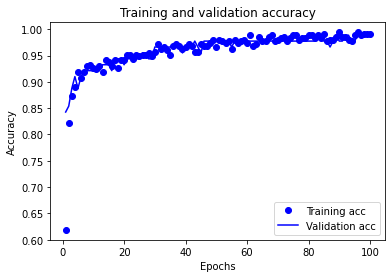

In [38]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [39]:
model.save("push_up_classification_100_test_acc.keras")

In [40]:
reconstructed_model = keras.models.load_model("push_up_classification_100_test_acc.keras")
test_loss_reconstructed, test_acc_reconstructed = reconstructed_model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy reconstructed:', test_acc_reconstructed)
print("Test loss reconstructed:", test_loss_reconstructed)

4/4 - 0s - loss: 0.0177 - accuracy: 1.0000

Test accuracy reconstructed: 1.0
Test loss reconstructed: 0.017713749781250954
